In [43]:
import numpy as np
import pandas as pd
import os
from time import time
import errno
import shutil
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Flatten,GlobalAveragePooling2D,Conv2D,MaxPooling2D,Activation,Dropout
from tensorflow.keras.layers import BatchNormalization, Softmax

import sklearn
from sklearn.datasets import fetch_lfw_people      ######
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
#from sklearn.decomposition import PCA
#from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV


In [44]:
def copy(src, dest):
    try:
        shutil.copytree(src, dest)
    except OSError as e:
        if e.errno == errno.ENOTDIR:
            shutil.copy(src, dest)
        else:
            print('Directory not copied. Error: %s' % e)
            
src = '../input/'
dest = '../LFW/lfw_home'
copy(src,dest) 

#### copy work is essential

Directory not copied. Error: [Errno 17] File exists: '../LFW/lfw_home'


In [45]:
###### read_only_area
print(os.listdir('../input'))
print(os.listdir('../input/lfwpeople'))

###### write_available_area
print(os.listdir('../LFW'))
print(os.listdir('../LFW/lfw_home'))
print(os.listdir('../LFW/lfw_home/lfwpeople'))   

path = '../LWF' 

['lfwpeople']
['pairsDevTrain.txt', 'lfw-funneled.tgz', 'pairsDevTest.txt', 'pairs.txt']
['lfw_home']
['lfwpeople']
['pairs.txt', 'pairsDevTest.txt', 'lfw-funneled.tgz', 'pairsDevTrain.txt']


In [46]:
lfw_dataset=sklearn.datasets.fetch_lfw_people(data_home=path,min_faces_per_person=100,download_if_missing=True)

In [47]:
print(lfw_dataset.images.shape)
print(lfw_dataset.data.shape)
print(lfw_dataset.target_names.shape)
print(lfw_dataset.target.shape)

(1140, 62, 47)
(1140, 2914)
(5,)
(1140,)


In [48]:
lfw_dataset.target

array([2, 3, 1, ..., 4, 2, 4])

In [49]:
Name = lfw_dataset.target_names

print(Name)
print(len(Name))

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
5


In [50]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [51]:
X0=lfw_dataset.images
y=lfw_dataset.target

In [52]:
print(X0.shape)
X=X0.reshape(-1,62,47,1)
print(X.shape)

(1140, 62, 47)
(1140, 62, 47, 1)


In [53]:
dataset=[]
testset=[]
t=0
for Xi,yi in zip(X,y):
    img=Xi/255.0
    if t<=200:
        dataset.append([img,yi])
    else:   
        testset.append([img,yi])
    t+=1

In [54]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [55]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [56]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [57]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [58]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(160, 62, 47, 1)
(41, 62, 47, 1)
(160, 5)
(41, 5)


In [59]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                    width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [25]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-jdneqn0x
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-jdneqn0x


In [28]:
from keras_vggface.vggface import VGGFace
from keras.engine import  Model
from keras.layers import Input


ModuleNotFoundError: No module named 'keras_applications'

In [29]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import random
import glob
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
vgg = VGGFace(include_top=False, weights='vggface',input_tensor=None, input_shape=[224, 224, 3]) 

NameError: name 'VGGFace' is not defined

In [90]:
model = Sequential()

model.add(Conv2D(32,(3,3), input_shape=(62,47,1), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(32,(3,3), input_shape=(62,47,1), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(BatchNormalization())


model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

In [98]:
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense
from tensorflow.keras import Model


In [104]:
input = Input(shape =(62,47,1))

# 1st Conv Block

x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(input)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
x = BatchNormalization
# 2nd Conv Block

x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 3rd Conv block  
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 4th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 5th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# Fully connected layers  
x = Flatten()(x) 
x = Dense(units = 512, activation ='relu')(x) 
x = Dense(units = 256, activation ='relu')(x) 
output = Dense(units = 5, activation ='softmax')(x)

In [105]:
model1 = Model (inputs=input, outputs =output)
model1.summary()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 62, 47, 1)]       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 62, 47, 64)        640       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 62, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 31, 24, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 31, 24, 128)       73856     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 31, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 12, 128)       0   

In [30]:
multi_classifier = Sequential()
multi_classifier.add(Conv2D(32, (3, 3), padding = 'same', input_shape=(62,47,1), activation = 'relu'))
multi_classifier.add(BatchNormalization())
multi_classifier.add(MaxPooling2D(pool_size = (2, 2), strides =(2,2)))
multi_classifier.add(Dropout(0.5))

multi_classifier.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
multi_classifier.add(BatchNormalization())
multi_classifier.add(MaxPooling2D(pool_size = (2, 2), strides =(2,2)))
multi_classifier.add(Dropout(0.5))

multi_classifier.add(Conv2D(128, (3, 3), padding = 'same',  activation = 'relu'))
multi_classifier.add(BatchNormalization())
multi_classifier.add(MaxPooling2D(pool_size = (2, 2), strides =(2,2)))
multi_classifier.add(Dropout(0.5))

multi_classifier.add(Conv2D(256, (3, 3), padding = 'same',activation = 'relu'))
multi_classifier.add(BatchNormalization())
multi_classifier.add(MaxPooling2D(pool_size = (2, 2), strides =(2,2)))
multi_classifier.add(Dropout(0.5))


multi_classifier.add(Flatten())
multi_classifier.add(Softmax())
multi_classifier.add(Dense(units = 256, activation = 'relu'))
multi_classifier.add(Dense(units = 128, activation = 'relu'))
multi_classifier.add(Dense(units = 64, activation = 'relu'))
multi_classifier.add(Dense(units = 5, activation = 'relu'))




In [106]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 60, 45, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 22, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 30, 22, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 22, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 10, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 8, 64)        

In [107]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [108]:
his=model1.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=1000)



Epoch 1/1000
5/5 [==============================] - 4s 486ms/step - loss: 1.7053 - accuracy: 0.3202 - val_loss: 1.6027 - val_accuracy: 0.3659
Epoch 2/1000
5/5 [==============================] - 1s 252ms/step - loss: 1.5996 - accuracy: 0.2681 - val_loss: 1.5964 - val_accuracy: 0.1951
Epoch 3/1000
5/5 [==============================] - 1s 256ms/step - loss: 1.5806 - accuracy: 0.2189 - val_loss: 1.5306 - val_accuracy: 0.3659
Epoch 4/1000
5/5 [==============================] - 1s 254ms/step - loss: 1.4456 - accuracy: 0.5005 - val_loss: 1.5174 - val_accuracy: 0.3659
Epoch 5/1000
5/5 [==============================] - 1s 252ms/step - loss: 1.4319 - accuracy: 0.4658 - val_loss: 1.5870 - val_accuracy: 0.3659
Epoch 6/1000
5/5 [==============================] - 1s 264ms/step - loss: 1.3784 - accuracy: 0.4879 - val_loss: 1.5361 - val_accuracy: 0.3659
Epoch 7/1000
5/5 [==============================] - 1s 253ms/step - loss: 1.3490 - accuracy: 0.5114 - val_loss: 1.5987 - val_accuracy: 0.3659
Epoch 

In [94]:
score = model.evaluate(testx, testy,  verbose =1)
print(score[0])

2/2 [==============================] - 0s 7ms/step - loss: 1.1033 - accuracy: 0.8780
1.1032994985580444


In [95]:
model.save('./alex.h5')

In [65]:
y_pred=multi_classifier.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground=np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.21      1.00      0.35         8
           1       0.00      0.00      0.00         8
           2       0.67      0.13      0.22        15
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         6

    accuracy                           0.24        41
   macro avg       0.18      0.23      0.11        41
weighted avg       0.28      0.24      0.15        41



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


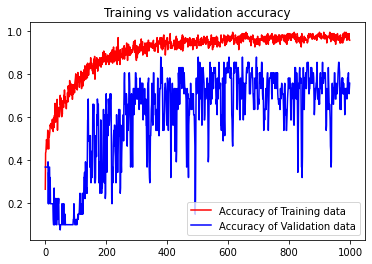

<Figure size 432x288 with 0 Axes>

In [67]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

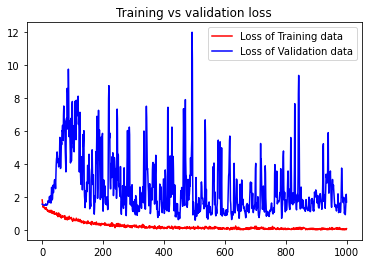

<Figure size 432x288 with 0 Axes>

In [68]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [82]:
def plot_gallery(images, titles, h, w, n_row=1, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

(4, 62, 47, 1)
(4, 62, 47)


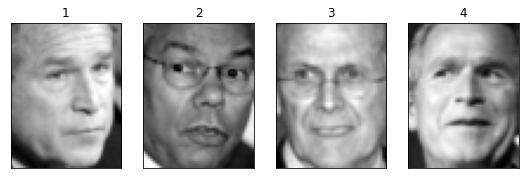

In [88]:
test1=test[0:4].reshape(4,62,47)
plot_gallery(test1,'1234',62,47)
print(test[0:4].shape)
print(test1.shape)

In [86]:
prediction_image=test[0:4]
prediction=model.predict(prediction_image)
print(prediction)

[[3.1780615e-14 2.6864784e-12 9.9999809e-01 1.0410298e-12 1.8844271e-06]
 [9.9560660e-01 1.3861172e-08 2.2302889e-03 2.1631496e-03 3.7071928e-08]
 [1.3790108e-09 9.9997902e-01 2.0471315e-07 2.0830570e-05 1.5537564e-08]
 [2.1012470e-11 5.7952809e-11 1.0000000e+00 1.7446675e-08 6.3590637e-13]]


In [87]:
for i in range(4):
    value=np.argmax(prediction[i])
    name=mapper(value)
    print("Prediction {} is {}.".format(i+1,name))

Prediction 1 is George W Bush.
Prediction 2 is Colin Powell.
Prediction 3 is Donald Rumsfeld.
Prediction 4 is George W Bush.


In [79]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

PRED=[]
for item in prediction2:
    value2=np.argmax(item)      
    PRED+=[value2]

(939, 62, 47, 1)
(939, 5)


In [80]:
ANS=tlabels0

AttributeError: 'tuple' object has no attribute 'shape'

In [81]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.8210862619808307
